In [1]:
import numpy as np

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def relu(z):
    s = np.fmax(0, z)
    return s

def softmax(a):
    sum = 0
    for i in a:
        sum += np.exp(i)
    return [np.exp(i) / sum for i in a]

print(softmax([1, 2, 3]))

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]


In [2]:
def randomize_weights(input_dim, num_hidden_nodes, output_nodes, wt_scale=1):
    np.random.seed(123)
    w = wt_scale*np.random.randn(num_hidden_nodes*input_dim).reshape((input_dim, num_hidden_nodes))
    v = wt_scale*np.random.randn(num_hidden_nodes * output_nodes).reshape((num_hidden_nodes, output_nodes))
    h_bias = wt_scale*np.random.randn(num_hidden_nodes)
    y_bias = wt_scale*np.random.randn(output_nodes) 
    return (w, v, h_bias, y_bias)

print(randomize_weights(3, 3, 4))

(array([[-1.0856306 ,  0.99734545,  0.2829785 ],
       [-1.50629471, -0.57860025,  1.65143654],
       [-2.42667924, -0.42891263,  1.26593626]]), array([[-0.8667404 , -0.67888615, -0.09470897,  1.49138963],
       [-0.638902  , -0.44398196, -0.43435128,  2.20593008],
       [ 2.18678609,  1.0040539 ,  0.3861864 ,  0.73736858]]), array([ 1.49073203, -0.93583387,  1.17582904]), array([-1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ]))


In [3]:
def feedforward_network_v3(x, w, v, h_bias, y_bias):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    a = np.dot(x,w) + h_bias
    h = relu(a)
    
    y = np.dot(h,v) + y_bias
    print(y)
    y = softmax(y)

    return np.array(y)

X = np.array([[1, 0, 0], [0, 1, 1]])
w, v, h_bias, y_bias = randomize_weights(3, 3, 4)
output = feedforward_network_v3(X, w, v, h_bias, y_bias)
print(output)

[[1.54580173 0.52464212 1.40539246 0.38685244]
 [7.69707618 3.47204376 2.48784408 1.58951771]]
[[0.00212623 0.04985946 0.25304235 0.23100142]
 [0.99787377 0.95014054 0.74695765 0.76899858]]


In [4]:
def grad_f(x):
    return x

def grad_descent(x_0, iterations, stepsize):
    for i in range(iterations):
        x_0 -= stepsize * grad_f(x_0);
    return x_0

In [5]:
print(grad_descent(1000, 100000, 0.01))

2.4e-322


In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

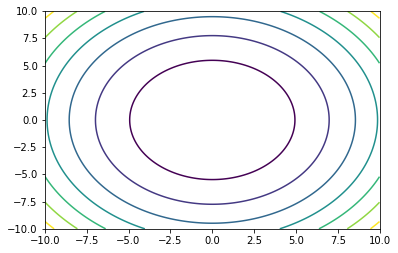

In [7]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 / 81 +  Y**2 / 100
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [8]:
def grad_f(vector):
    x, y = vector
    df_dx = (2/81)*x 
    df_dy = (2/100)*y
    return np.array([df_dx, df_dy])

In [9]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

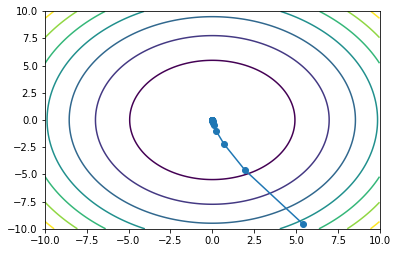

In [10]:
np.random.seed(10)
traj = grad_descent(iterations=20, learning_rate=26)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [11]:
def grad_f(x):
    return 3 * (x - 2)**2 - 6*x

def grad_descent(x_0, iterations, stepsize):
    for i in range(iterations):
        x_0 -= stepsize * grad_f(x_0);
    return x_0

In [16]:
print(grad_descent(20, 200, 0.1))

OverflowError: (34, 'Result too large')